In [16]:
import glob
from skimage import io
from skimage import color
from skimage.transform import resize
from matplotlib import pyplot as plt
import cv2
import numpy as np
from sklearn.decomposition import PCA
%load_ext autoreload
%autoreload 2
import predict
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import predict

traindir = 'data/MYDATA/train/'
X, y, processed_images, original_images = predict.get_custom_data(traindir, (40, 40))

# fn = 'data/MYDATA/train/449_j.png'
# image = io.imread(fn)
# plt.imshow(image, cmap="Greys_r")
# plt.show()

# irawsymbols = predict.file_to_raw_symbols(fn, True)

# for image, symbol in zip(trainimages, ytrain):
#     plt.imshow(image, cmap="Greys_r")
#     plt.title(symbol)
#     plt.show()

In [10]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

transforms = [
    PCA(n_components=3),
    PCA(n_components=5),
    PCA(n_components=10),
    PCA(n_components=15),
    PCA(n_components=20),
    PCA(n_components=25),
    PCA(n_components=30),
    PCA(n_components=35)
]

models = [
    MLPClassifier(max_iter=300),
    MLPClassifier(hidden_layer_sizes=(100,100), max_iter=300),
    SVC(),
    SVC(decision_function_shape='ovo'),
    LinearSVC(),
    AdaBoostClassifier(n_estimators=100)
]

for ts in transforms:
    ts.fit(X)

bscore = 0
for model in models:
    for ts in transforms:
        Xts = ts.transform(X)
        score = np.mean(cross_val_score(model, Xts, y, cv=5))
        if(score > bscore):
            bmodel = model
            bts = ts
            bscore = score

In [11]:
print(bscore)
print(bts)
print(bmodel)

0.976059332377
PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [14]:
from sklearn.externals import joblib

Xts = bts.transform(X)
bmodel.fit(Xts, y)
print(bmodel.score(Xts, y))

joblib.dump(bmodel, 'MLPCustom2.p')
joblib.dump(bts, 'PCACustom2.p')

1.0


['PCACustom2.p']

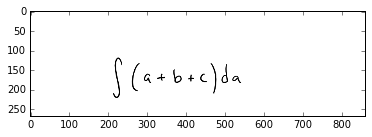

In [15]:
fn = 'data/MYDATA/overall/0_1.png'
ioverall = io.imread(fn)
plt.imshow(ioverall, cmap="Greys_r")
plt.show()

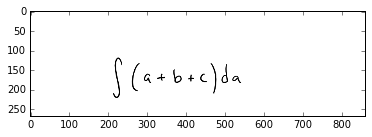

\int (e+N+e)dM


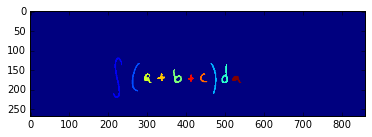

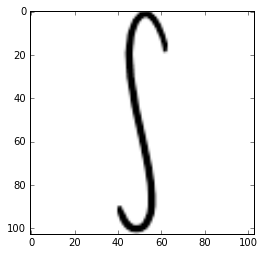

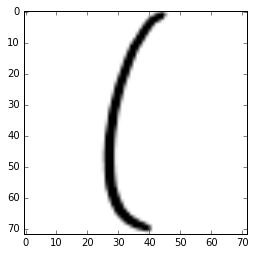

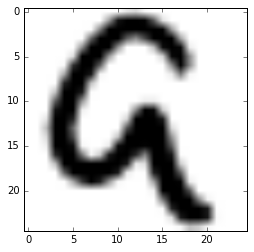

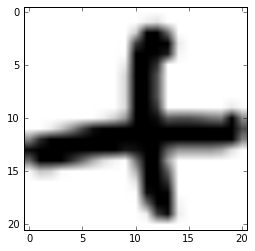

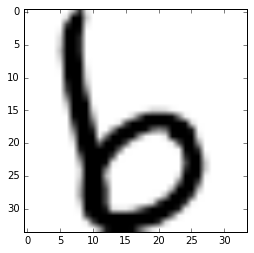

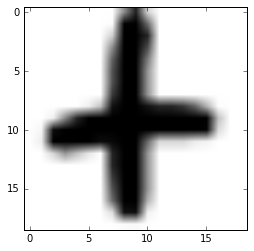

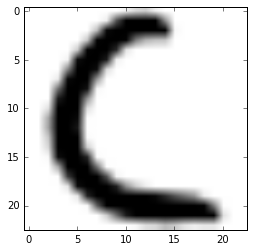

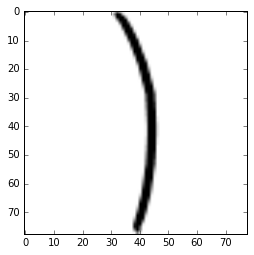

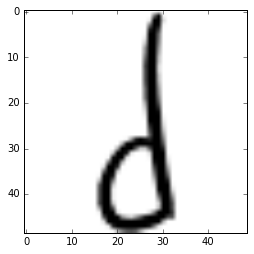

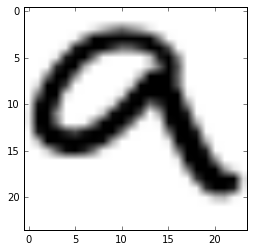

In [58]:
import predict

fnimage = 'data/MYDATA/overall/0_1.png'
fnclf = 'MLPCustom2.p'
fnft = 'PCACustom2.p'

image = io.imread(fnimage)

plt.imshow(image, cmap="Greys_r")
plt.show()

latex, fnlabels, irawsymbols = predict.do_the_damn_thing(fnimage, fnclf, fnft)

ilabels = io.imread(fnlabels)

print(latex)
plt.imshow(ilabels)
plt.show(fnlabels)

for isymbol in irawsymbols:
    plt.imshow(isymbol, cmap="Greys_r")
    plt.show()